In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Jul 21 20:48:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls ./gdrive/MyDrive/images_for_learning

parallel_run0000_2.nc  parallel_run0017_2.nc  parallel_run0034_2.nc
parallel_run0001_2.nc  parallel_run0018_2.nc  parallel_run0035_2.nc
parallel_run0002_2.nc  parallel_run0019_2.nc  parallel_run0036_2.nc
parallel_run0003_2.nc  parallel_run0020_2.nc  parallel_run0037_2.nc
parallel_run0004_2.nc  parallel_run0021_2.nc  parallel_run0038_2.nc
parallel_run0005_2.nc  parallel_run0022_2.nc  parallel_run0039_2.nc
parallel_run0006_2.nc  parallel_run0023_2.nc  parallel_run0040_2.nc
parallel_run0007_2.nc  parallel_run0024_2.nc  parallel_run0041_2.nc
parallel_run0008_2.nc  parallel_run0025_2.nc  parallel_run0042_2.nc
parallel_run0009_2.nc  parallel_run0026_2.nc  parallel_run0043_2.nc
parallel_run0010_2.nc  parallel_run0027_2.nc  parallel_run0044_2.nc
parallel_run0011_2.nc  parallel_run0028_2.nc  parallel_run0045_2.nc
parallel_run0012_2.nc  parallel_run0029_2.nc  parallel_run0046_2.nc
parallel_run0013_2.nc  parallel_run0030_2.nc  parallel_run0047_2.nc
parallel_run0014_2.nc  parallel_run0031_2.nc  pa

In [ ]:
!ls ./gdrive/MyDrive/Unet_test_regression/

'AMS LaTeX REU paper template.zip'	'Number 2.pdf'
'AMS presentation.gslides'		'Number 4.pdf'
'A TEENAGE STORY.gdoc'			 Portfolio.gslides
 Atmospheric_Sciences_101_REU_2020.pdf	'REU 21 5min.gslides'
'Bullet Points.gdoc'			'REU 5 mintalk_16x9.gslides'
'Colab Notebooks'			'REU Paper Rough Draft.gdoc'
'Copy of REU 5 mintalk_16x9.gslides'	'REU Project.gdoc'
 downloaded_resources.zip		'Science project.gslides'
'Further Graphs.gdoc'			'Short Summary.gdoc'
'Getting started.pdf'			'unet_regression_test (1).py'
 HW2-Robinson.pdf			 unet_regression_test.py
 HW3_Robinson.pdf			 Unet_regress_Test.ipynb
 images_for_learning_20210713		 Unet_test_regression
'ISOBAR Data Sandbox (1).ipynb'		'Untitled document.docx'
'ISOBAR Data Sandbox.ipynb'		'Untitled document.gdoc'
'November 12-19, 2019.gdoc'		'What I Did Last Summer.gslides'


In [ ]:
!pip install keras_unet_collection

In [ ]:
!pip install seaborn

In [ ]:
!pip install sklearn

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
from keras_unet_collection import models, losses
import tensorflow as tf
from tensorflow import keras
import xarray as xr
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import csv
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
print('Hello World')
infiles = glob.glob('./gdrive/MyDrive/images_for_learning/*')
metadata_outfile_name = './gdrive/MyDrive/Unet_test_regression/unet_regression_test14_output.csv'

Hello World


In [ ]:
checkpoint_path = './gdrive/MyDrive/Unet_test_regression/regression_test_14/'
metadata_outfile1_name = checkpoint_path + 'metadata_predict.csv'
predictions_outfile_name = checkpoint_path + 'predictions.nc'

In [ ]:
ds = xr.open_mfdataset(infiles, concat_dim='n_samples',combine='nested', parallel=True)
ds


,Array,Chunk
Bytes,404.06 MB,2.05 MB
Shape,"(49324, 32, 32)","(250, 32, 32)"
Count,600 Tasks,200 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,404.06 MB,2.05 MB
Shape,"(49324, 32, 32)","(250, 32, 32)"
Count,600 Tasks,200 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [ ]:
#read in the data
ds = xr.open_mfdataset(infiles, concat_dim='n_samples',combine='nested', parallel=True)
print(ds)

#Separate the data array into ml input, ml output and metadata
output_ds = ds.mesh_90
output_array = output_ds.values

mesh = ds.mesh.values
mesh_90_percentiles = ds.mesh_90_percentiles.values
mesh_90_mean = ds.mesh_90_mean.values
mesh_90_std = ds.mesh_90_std.values
mesh_90 = ds.mesh_90.values
meshfrac = ds.meshfrac.values
time = ds.time.values
lon = ds.lon.values
lat = ds.lat.values


input_ds = ds.drop(('mesh_90_mean','mesh_90_std','mesh_90_percentiles','mesh','mesh_90','meshfrac','time','lon','lat'))
variables = []
for variable in input_ds:
    variables.append(ds[variable])
    print(variable)
input_array = np.stack(variables)


<xarray.Dataset>
Dimensions:              (dim_0: 1, n_samples: 49324, qunatile2: 7, x: 32, y: 32)
Coordinates:
    longitude            (n_samples, x, y) float64 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    latitude             (n_samples, x, y) float64 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    longitude2           (n_samples, x, y) float64 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    latitude2            (n_samples, x, y) float64 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
Dimensions without coordinates: dim_0, n_samples, qunatile2, x, y
Data variables: (12/25)
    temp_sfc             (n_samples, x, y) float32 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    dewtemp_sfc          (n_samples, x, y) float32 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    w_sfc                (n_samples, x, y) float32 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    u_sfc                (n_samples, x, y) float32 dask.array<chunksiz

In [ ]:
output_ds

,Array,Chunk
Bytes,404.06 MB,2.05 MB
Shape,"(49324, 32, 32)","(250, 32, 32)"
Count,600 Tasks,200 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,404.06 MB,2.05 MB
Shape,"(49324, 32, 32)","(250, 32, 32)"
Count,600 Tasks,200 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [ ]:
input_array.shape

(16, 49324, 32, 32)

In [ ]:
output_array.shape

(49324, 32, 32)

In [ ]:
#Format the ml input and output arrays so the unet reads them correctly
input_array = np.swapaxes(input_array,0,1)
input_array = np.swapaxes(input_array,1,3)
output_array = np.swapaxes(output_array,1,2)

In [ ]:
input_array.shape

(17, 12250, 32, 32)

In [ ]:
output_array.shape

(49324, 32, 32)

In [ ]:


#convert output data to a log scale

#bad_data = np.where(output_array <= 0.0)
#output_array = np.log10(output_array)
#output_array[bad_data] = -10 

#define some of the input parameters to the ml files (instead of hardcoding them)
num_up_down_layers = 2
patch_size = input_array.shape[1]
batch_size = 32
num_inputs = input_array.shape[3]
#print(patch_size)
#print(batch_size)
#print(num_inputs)
#input_array = input_array.swapaxes(0,3)

filter_num = []
size = patch_size
for i in range(num_up_down_layers + 1):
    filter_num = [int(size/(2**i))] + filter_num
#print(filter_num)


#Save out the metadata
fields = ['Time', 'Lat', 'Lon', 'Rel_Freq_MESH'] 

rows = []
for i in range(batch_size):
    rows.append([time[i][0],lat[i][0],lon[i][0],meshfrac[i][0]])

with open(metadata_outfile_name, 'a') as csvfile:
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields) 
    csvwriter.writerows(rows)



#make a basic unet
model = models.unet_2d((patch_size,patch_size,num_inputs), filter_num = filter_num, n_labels = 1, 
                        stack_num_down = num_up_down_layers, stack_num_up = num_up_down_layers, 
                        activation = 'LeakyReLU', output_activation = 'ReLU', 
                        batch_norm = True, pool = True, unpool = True, name = 'regression_unet')

#compile the unet
learning_rate = 1e-4
loss_function = keras.losses.MeanSquaredError()

adam = Adam(learning_rate=learning_rate)
model.compile(loss=loss_function, optimizer=adam, metrics=tf.keras.metrics.Accuracy())

#train the model

early_stopping = EarlyStopping('loss',patience=500,verbose=2)
checkpoint = tf.keras.callbacks.ModelCheckpoint('./gdrive/MyDrive/Unet_test_regression/regression_test_14',
                        monitor='loss', verbose=1, save_best_only=True, 
                        save_weights_only=False, save_freq='epoch')

trained_model = model.fit(input_array, output_array, epochs=500, batch_size=batch_size, validation_freq=10,
                        callbacks=[early_stopping, checkpoint], verbose=2, workers=2, 
                        use_multiprocessing=True, max_queue_size=100)
                        



Epoch 1/500
1542/1542 - 31s - loss: 0.1681 - accuracy: 0.8492

Epoch 00001: loss improved from inf to 0.16813, saving model to ./gdrive/MyDrive/Unet_test_regression/regression_test_14
INFO:tensorflow:Assets written to: ./gdrive/MyDrive/Unet_test_regression/regression_test_14/assets
Epoch 2/500
1542/1542 - 14s - loss: 0.1625 - accuracy: 0.9103

Epoch 00002: loss improved from 0.16813 to 0.16255, saving model to ./gdrive/MyDrive/Unet_test_regression/regression_test_14
INFO:tensorflow:Assets written to: ./gdrive/MyDrive/Unet_test_regression/regression_test_14/assets
Epoch 3/500
1542/1542 - 14s - loss: 0.1599 - accuracy: 0.9150

Epoch 00003: loss improved from 0.16255 to 0.15986, saving model to ./gdrive/MyDrive/Unet_test_regression/regression_test_14
INFO:tensorflow:Assets written to: ./gdrive/MyDrive/Unet_test_regression/regression_test_14/assets
Epoch 4/500
1542/1542 - 14s - loss: 0.1575 - accuracy: 0.9215

Epoch 00004: loss improved from 0.15986 to 0.15752, saving model to ./gdrive/MyD

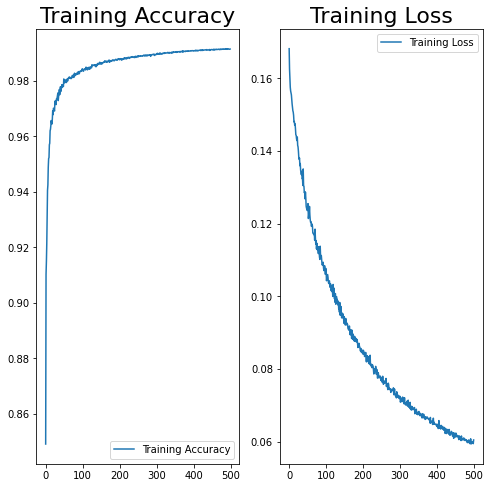

In [ ]:
acc = trained_model.history['accuracy']
#val_acc = trained_model.history['val_accuracy']

loss = trained_model.history['loss']
#val_loss = trained_model.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy',fontsize=22) 

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss',fontsize=22)
plt.show()



In [ ]:
y_hat = model.predict(input_array)
plt.show()

In [ ]:
y_hat

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [ ]:
#Normalize the Inputs
mu = np.mean(input_array,axis=(1,2,3))
sigma = np.std(input_array,axis=(1,2,3))
#need to reshape mu and sigma to match shape 
mu = np.tile(mu[:,np.newaxis],(1,input_array.shape[1]))
mu = np.tile(mu[:,:,np.newaxis],(1,1,input_array.shape[2]))
mu = np.tile(mu[:,:,:,np.newaxis],(1,1,1,input_array.shape[3]))
sigma = np.tile(sigma[:,np.newaxis],(1,input_array.shape[1]))
sigma = np.tile(sigma[:,:,np.newaxis],(1,1,input_array.shape[2]))
sigma = np.tile(sigma[:,:,:,np.newaxis],(1,1,1,input_array.shape[3]))
input_array_scaled = (input_array - mu)/sigma


#Save out the metadata
rows = []
with open(metadata_outfile1_name, 'a') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Time'] + list(time))
    csvwriter.writerow(['Lat'] + list(lat))
    csvwriter.writerow(['Lon'] + list(lon))
    csvwriter.writerow(['MESH Fraction'] + list(meshfrac))
    csvwriter.writerow(['mesh_90_mean'] + list(mesh_90_mean))
    csvwriter.writerow(['mesh_90_std'] + list(mesh_90_std))
    csvwriter.writerow(['mesh_90_percentiles_min'] + list(mesh_90_percentiles[:,:,0]))
    csvwriter.writerow(['mesh_90_percentiles_90'] + list(mesh_90_percentiles[:,:,1]))
    csvwriter.writerow(['mesh_90_percentiles_max'] + list(mesh_90_percentiles[:,:,2]))

    
#make a basic unet
model = keras.models.load_model(checkpoint_path)

y_hat = model.predict(input_array) 


ds_return = xr.Dataset(data_vars=dict(true_no_hail = (["patch", "x", "y"], output_array[:,:,:,0]),
                            true_hail = (["patch", "x", "y"], output_array[:,:,:,1]),
                            predicted_no_hail = (["patch", "x", "y"], y_hat[:,:,:,0]),
                            predicted_hail = (["patch", "x", "y"], y_hat[:,:,:,1]),
                    coords=dict(patch = range(y_hat[0]),
                            x = range(32),
                            y = range(32))))


NameError: ignored

In [ ]:
y_hat.shape

(1, 32, 32, 49324)

In [ ]:
y_hat = model.predict(input_array)
plt.show()

In [ ]:
index = []
for i in range(mesh_90.shape[0]):
    if(mesh_90[i,:,:].max() > 50):
         index.append(i)

In [ ]:
#function to plot the ml_output
def plot_ml_output(output, idx = 0):
  keys = ["Regression Output"]
  fig, axes = plt.subplots(1,2,figsize=(20,5))
  axes = axes.ravel()
  for i,ax in enumerate(axes[:-1]):
    pm = ax.imshow(output[idx,:,:,i].T,cmap = 'cividis',vmin = 0,vmax = 60)
    ax.set_title(keys[i])
    plt.colorbar(pm, ax=ax,shrink=0.60)
  axes[-1].axis(False)
  plt.tight_layout()

In [ ]:
y_hat.shape

(49324, 32, 32, 1)

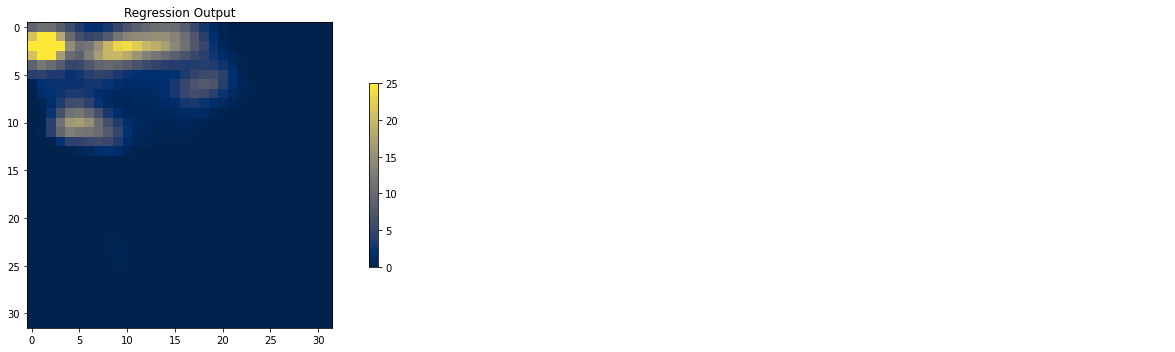

In [ ]:
plot_ml_output(y_hat,idx=index[17])

In [ ]:
42
#function to plot the HRRR input variable fields
def plot_patch(patches, idx = 0):
    r = idx
    keys = list(patches.variables.keys())
    keys.sort()
    fig,axes = plt.subplots(4,5,figsize=(20,15))
    axes = axes.ravel()
    for i,ax in enumerate(axes[:-1]):
        pm = ax.imshow(patches[keys[i]].values[r,:,:],cmap='cividis')
        ax.set_title(keys[i])
        plt.colorbar(pm,ax=ax,shrink=0.75)
    axes[-1].axis(False)
    plt.tight_layout()
#function to plot the truth data
def plot_mesh_truth(mesh_90, idx = 0):
  keys = ["90th Percentile MRMS"]
  fig, axes = plt.subplots(1,2,figsize=(20,5))
  axes = axes.ravel()
  for i,ax in enumerate(axes[:-1]):
    pm = ax.imshow(mesh_90[idx,:,:,i],cmap = 'cividis',vmin = 0,vmax = 1)
    ax.set_title(keys[i])
    plt.colorbar(pm, ax=ax,shrink=0.60)
  axes[-1].axis(False)
  plt.tight_layout()
#function to plot the ml_output
def plot_ml_output(output, idx = 0):
  keys = ["Regression Output"]
  fig, axes = plt.subplots(1,2,figsize=(20,5))
  axes = axes.ravel()
  for i,ax in enumerate(axes[:-1]):
    pm = ax.imshow(output[idx,:,:,i],cmap = 'cividis',vmin = 0,vmax = 1)
    ax.set_title(keys[i])
    plt.colorbar(pm, ax=ax,shrink=0.60)
  axes[-1].axis(False)
  plt.tight_layout()
#function to plot all of the above values and save them out
def plot_all(input_ds, output_array, y_hat, index, save_file = ""):
  print("HRRR Input Fields:")
  plot_patch(input_ds, index)
  if save_file != "":
    plt.savefig(save_file + str(index) + "_hrrr.png")
  plt.show()
  print("MRMS Truth:")
  plot_mesh_truth(output_array, index)
  if save_file != "":
    plt.savefig(save_file + str(index) + "_mrms_truth.png")
  plt.show()
  print("ML Output:")
  plot_ml_output(y_hat, index)
  if save_file != "":
    plt.savefig(save_file + str(index) + "_ml_output.png")
  plt.show()

IndexError: ignored

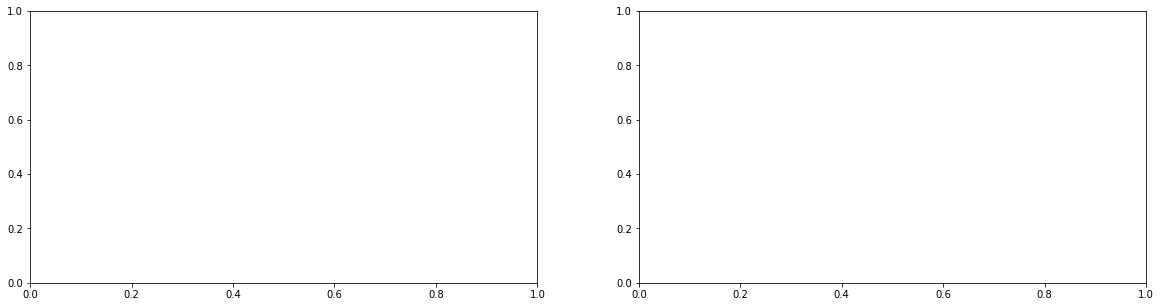

In [ ]:
plot_mesh_truth(output_array,index[2])

In [ ]:
plot_all

<function __main__.plot_all>

HRRR Input Fields:


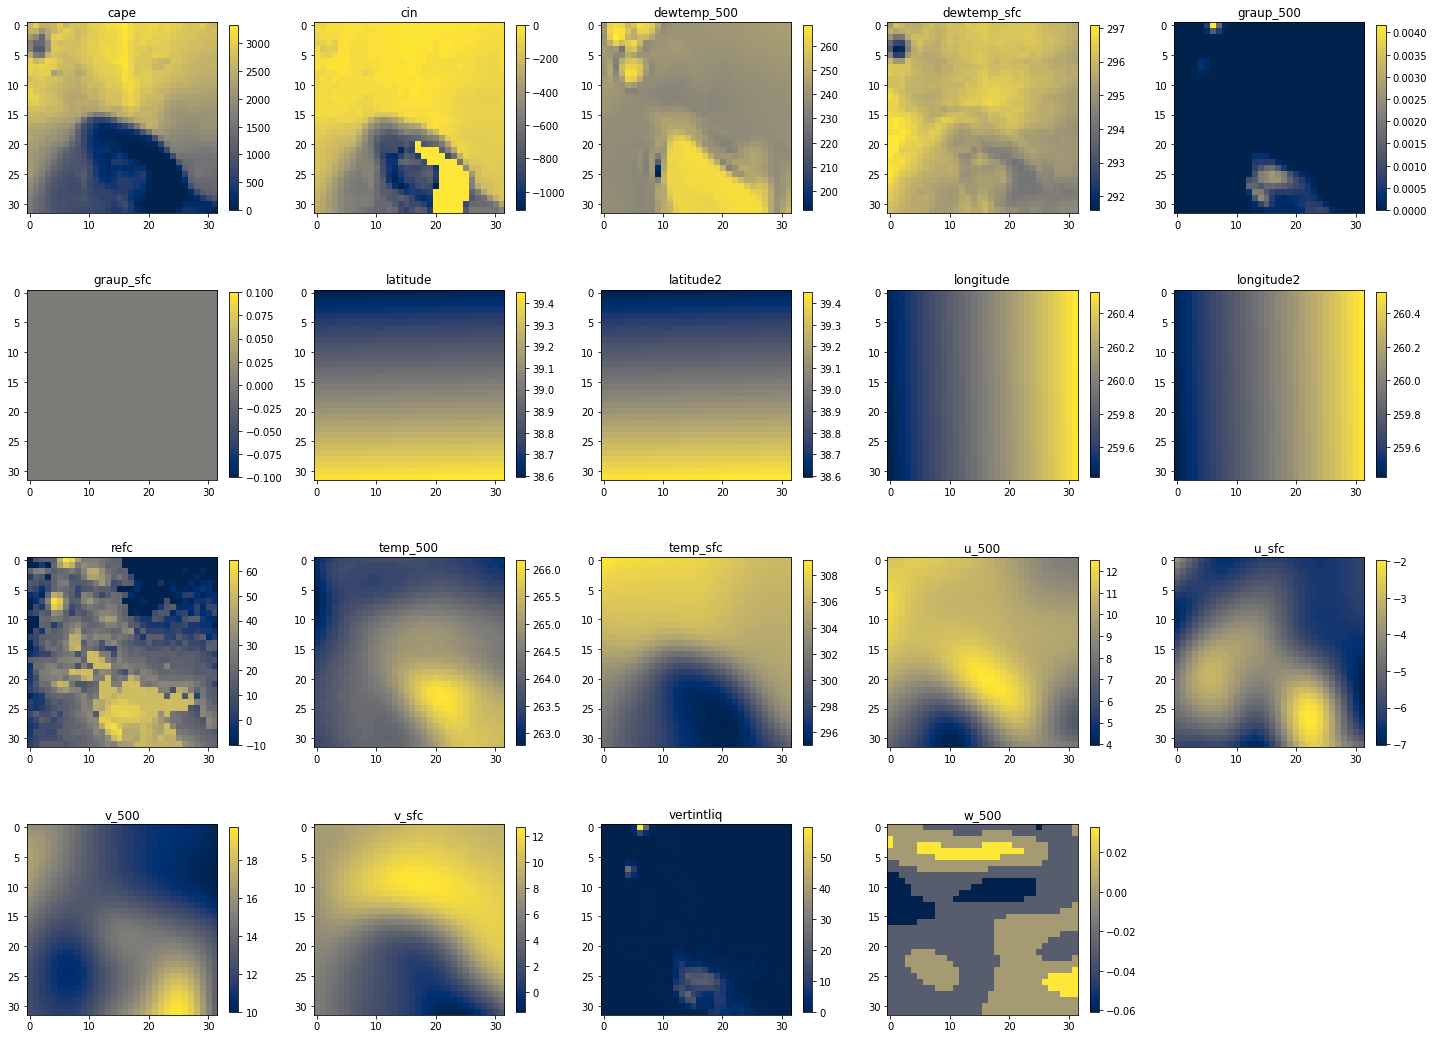

MRMS Truth:


IndexError: ignored

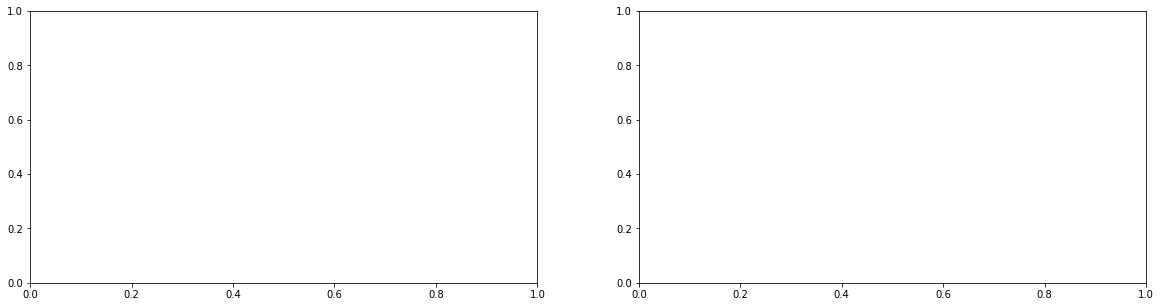

In [ ]:
plot_all(input_ds, output_array, y_hat,index[3])